# Exploratory Data Analysis 
### a) Build data profile table and plots i) Outliers and Anamolies
### b) Explore data relationships
### c) Identificationand creation of features

In [28]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# cntl ? makes something a comment
# esc - shift R enter runs all above
#esc cmd shift R runs all cells
# esc 1, 2, 3, 4, 5 makes something a kind of header
# esc X cuts a cell

In [29]:
os.getcwd()

'/home/vizziwo/capcookie/notebooks'

In [30]:
df = pd.read_csv('/home/vizziwo/capcookie/data/processed/fatalwrangling.csv', index_col=0)
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Should I have dropped the 'id' column in Wrangling? Does it matter?

In [31]:
df.drop(columns='id', inplace=True)

In [32]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Hist of ages of those killed

Text(0, 0.5, 'Number Killed')

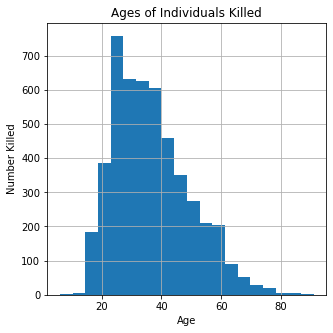

In [33]:
df.age.hist(bins=20, figsize=(5,5))
plt.title('Ages of Individuals Killed')
plt.xlabel('Age')
plt.ylabel('Number Killed')

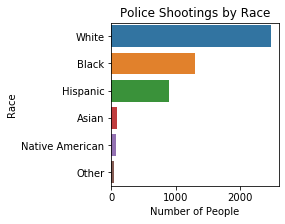

In [34]:
#Visualize races
f, ax = plt.subplots(figsize = (3,3))
killed_by_police = pd.DataFrame(df.race.value_counts())
races = list(['White','Black','Hispanic','Asian','Native American','Other'])
values = list(killed_by_police.race)
sns.barplot(x=values, y=races)
plt.title('Police Shootings by Race')
plt.xlabel('Number of People')
plt.ylabel('Race')
plt.savefig('../reports/figures/race.png',bbox_inches='tight')

## Some argue that numbers of people by race alone don't tell the story. Maybe we should look at deaths as compared to national population.

In [35]:
# I used Census pop estimates from 2019 https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html
Census_pop_counts_today = pd.DataFrame([250522190, 44075086, 60572237 , 19504862, 4188092, 9949293],['W','B','H','A','N','O'],columns=['US_pop'])

In [36]:
z = pd.concat([killed_by_police, Census_pop_counts_today], axis=1)
z.columns = ['killed_by_police', 'US_pop']
z['deaths_per_cap'] = z.killed_by_police / z.US_pop
z

,killed_by_police,US_pop,deaths_per_cap
W,2479,250522190,0.000010
B,1298,44075086,0.000029
H,904,60572237,0.000015
A,93,19504862,0.000005
N,78,4188092,0.000019
O,48,9949293,0.000005


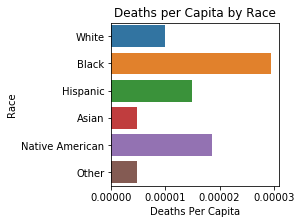

In [37]:
#Visualize races
f, ax = plt.subplots(figsize = (3,3))
races = list(['White','Black','Hispanic','Asian','Native American','Other'])
values = list(z.deaths_per_cap)
g = sns.barplot(x=values, y=races)
plt.title('Deaths per Capita by Race')
plt.ylabel('Race')
plt.xlabel('Deaths Per Capita')
plt.savefig('../reports/figures/racepercapita.png', bbox_inches='tight')

## Hist of those killed by state.

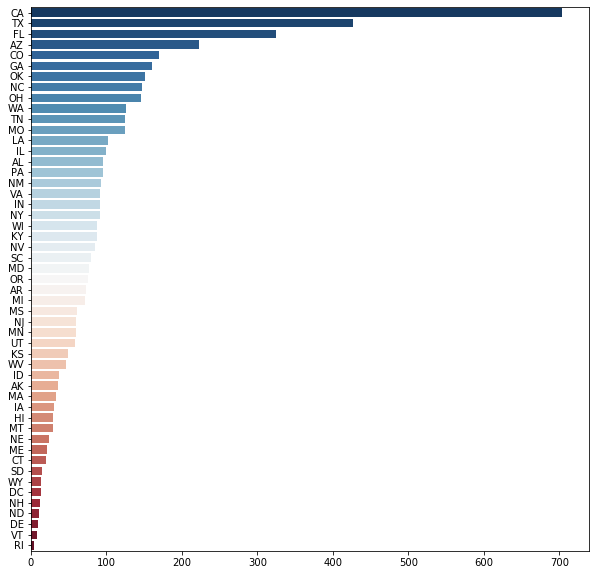

In [38]:
# Now do the same for states! 
f, ax = plt.subplots(figsize=(10,10))
y = pd.DataFrame(df.state.value_counts())
states = list(y.index)
values = list(y.state)
sns.barplot(x=values,y=states, palette="RdBu_r")

### What are the race value counts in CA are, since so many deaths happened there.

In [86]:
df[df.state=='CA'].race.value_counts().reset_index().sort_values('index')

,index,race
3,A,29
2,B,123
0,H,318
5,N,4
4,O,9
1,W,221


### Visualizing the race value counts for top 4 states in shootings by police

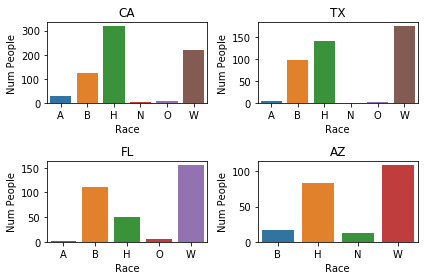

In [115]:
f, ax = plt.subplots(2, 2)
plt.subplot(221)
sns.barplot(x=df[df.state=='CA'].race.value_counts().reset_index().sort_values('index')['index'],
           y=df[df.state=='CA'].race.value_counts().reset_index().sort_values('index')['race'])
plt.title('CA')
plt.xlabel('Race')
plt.ylabel('Num People')
plt.subplot(222)
sns.barplot(x=df[df.state=='TX'].race.value_counts().reset_index().sort_values('index')['index'],
           y=df[df.state=='TX'].race.value_counts().reset_index().sort_values('index')['race'])
plt.title('TX')
plt.xlabel('Race')
plt.ylabel('Num People')

plt.subplot(223)
sns.barplot(x=df[df.state=='FL'].race.value_counts().reset_index().sort_values('index')['index'],
           y=df[df.state=='FL'].race.value_counts().reset_index().sort_values('index')['race'])
plt.title('FL')
plt.xlabel('Race')
plt.ylabel('Num People')

plt.subplot(224)
sns.barplot(x=df[df.state=='AZ'].race.value_counts().reset_index().sort_values('index')['index'],
           y=df[df.state=='AZ'].race.value_counts().reset_index().sort_values('index')['race'])
plt.title('AZ')
plt.xlabel('Race')
plt.ylabel('Num People')

plt.tight_layout()
plt.savefig('../reports/figures/statesbyrace.png', bbox_inches = 'tight')

##### This does look like it's increasing proportions Black and Hispanic people when compared to the distribution of the whole dataset.

### Now I'm curious how the races of folks killed in cities with less deaths compares to those in cities with more deaths.

In [40]:
df.city.value_counts().head(60)

Los Angeles         78
Phoenix             66
Houston             51
Las Vegas           41
San Antonio         40
Chicago             38
Columbus            36
Albuquerque         32
Jacksonville        31
Oklahoma City       30
St. Louis           30
Austin              29
Kansas City         29
Miami               26
Denver              24
Tucson              23
Louisville          23
Bakersfield         22
Atlanta             21
New York            21
Tulsa               21
Orlando             20
Mesa                20
Baltimore           19
Portland            18
Indianapolis        18
Fresno              18
Long Beach          17
Philadelphia        16
Pueblo              16
Charlotte           16
Colorado Springs    16
Springfield         15
San Diego           15
Arlington           15
San Jose            15
Memphis             15
San Francisco       15
Aurora              15
Washington          15
Milwaukee           14
San Bernardino      14
Dallas              14
Greenville 

In [41]:
# Cities will less than 12 deaths.
df.city.value_counts()[df.city.value_counts() < 12].head()

Reno           11
Wichita        11
Baton Rouge    11
Tampa          11
Sacramento     11
Name: city, dtype: int64

In [42]:
# How many people were killed in cities with less than 12 deaths? 3750 out of 4500!!!

df.city.value_counts()[df.city.value_counts() < 12].sum()

3745

### Making a dataframe so I can see the racial makeup of victims in low-death cities

In [43]:
cities = pd.Series(df.city.value_counts()[df.city.value_counts() < 12].index)
df.merge(cities.rename('new'), left_on='city', right_on='new').race.value_counts()

W    2123
B     878
H     584
N      65
A      59
O      36
Name: race, dtype: int64

### Doing the same for higher-death cities

In [44]:
bigcities = pd.Series(df.city.value_counts()[df.city.value_counts() >= 12].index)
df.merge(bigcities.rename('new'), left_on='city', right_on='new').race.value_counts()

B    420
W    356
H    320
A     34
N     13
O     12
Name: race, dtype: int64

## This is an interesting distinction: cities with less police killings see more white victims. Cities with more police killings see more black and hispanic killings

### I'm going to graph 'black' deaths against 'total deaths'

In [45]:
y = pd.DataFrame(df.groupby('city')['race'].value_counts())

In [46]:
y.columns = ['value']

In [47]:
y

value
city       race       
Abbeville  B         1
Aberdeen   W         2
Abilene    W         2
           B         1
Abingdon   H         1
...                ...
Yuma       H         2
           W         1
Zanesville W         1
Zion       B         1
           W         1

[2891 rows x 1 columns]

In [48]:
y = y.unstack()

In [49]:
y

value                       
race                  A    B    H   N   O    W
city                                          
Abbeville           NaN  1.0  NaN NaN NaN  NaN
Aberdeen            NaN  NaN  NaN NaN NaN  2.0
Abilene             NaN  1.0  NaN NaN NaN  2.0
Abingdon            NaN  NaN  1.0 NaN NaN  1.0
Abington Township   NaN  NaN  1.0 NaN NaN  NaN
...                 ...  ...  ...  ..  ..  ...
Yucca Valley        NaN  NaN  1.0 NaN NaN  1.0
Yulee               NaN  1.0  NaN NaN NaN  1.0
Yuma                NaN  NaN  2.0 NaN NaN  1.0
Zanesville          NaN  NaN  NaN NaN NaN  1.0
Zion                NaN  1.0  NaN NaN NaN  1.0

[2290 rows x 6 columns]

In [50]:
y = y.astype('str').apply(lambda x: x.replace('nan','0'))

In [51]:
y = y.astype('float')

In [52]:
y.columns = y.columns.droplevel(0)

In [53]:
y['total'] = y.A + y.B + y.H + y.N + y.O + y.W
y.head()

race,A,B,H,N,O,W,total
city,,,,,,,
Abbeville,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Aberdeen,0.0,0.0,0.0,0.0,0.0,2.0,2.0
Abilene,0.0,1.0,0.0,0.0,0.0,2.0,3.0
Abingdon,0.0,0.0,1.0,0.0,0.0,1.0,2.0
Abington Township,0.0,0.0,1.0,0.0,0.0,0.0,1.0


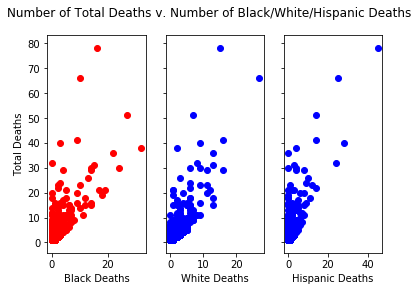

In [54]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
ax1.scatter('B', 'total', data=y, color='red', label='black');

ax2.scatter('W', 'total', data=y, color='blue', label='white');
ax3.scatter('H', 'total', data=y, color='blue', label='white');


f.suptitle('Number of Total Deaths v. Number of Black/White/Hispanic Deaths');
ax1.set(xlabel='Black Deaths',ylabel='Total Deaths');
ax2.set(xlabel='White Deaths')
ax3.set(xlabel = 'Hispanic Deaths')
plt.show()

##### Actually doesn't look much different in distributions. Black deaths and white deaths both trend upwards with increasing police-caused deaths in a city

# Value Counts of Categorical Variables

In [80]:
print(df.flee.value_counts(), '\n')
print(df.threat_level.value_counts(), '\n')
print(df.manner_of_death.value_counts())

Not fleeing    3078
Car             820
Foot            642
Other           360
Name: flee, dtype: int64 

attack          3163
other           1530
undetermined     207
Name: threat_level, dtype: int64 

shot                4652
shot and Tasered     248
Name: manner_of_death, dtype: int64


In [81]:
pd.set_option('display.max_rows',200)
df.armed.value_counts()

# I CONSIDERED AN ORDINAL SCALE FOR THIS FEATURE,
# BUT DECIDED ON DUMMY ENCODING INSTEAD
# For example, whether the weapon is close/long range 
# and its lethality:
#1: gun,
#2: other explosive, 
#3: sharp weapon/vehicle, 
#4: sharp other object, 
#5: potentially lethal projectile (taser, nailgun, bow and arrow), 
#6: nonlethal projectile, 
#7: blunt object.

gun                                 2759
knife                                708
undetermined                         352
unarmed                              347
toy weapon                           172
vehicle                              120
unknown weapon                        66
machete                               39
Taser                                 24
sword                                 22
ax                                    21
baseball bat                          16
gun and knife                         15
hammer                                14
metal pipe                            12
screwdriver                           12
hatchet                               11
sharp object                          11
box cutter                            11
gun and vehicle                       10
gun and car                            9
scissors                               7
rock                                   6
crossbow                               6
piece of wood   

##### Cardinal ordering doesn't really seem appropriate, because they're categorical variables, and the ordering is subjective.

# Plotting histograms of categorical variables.

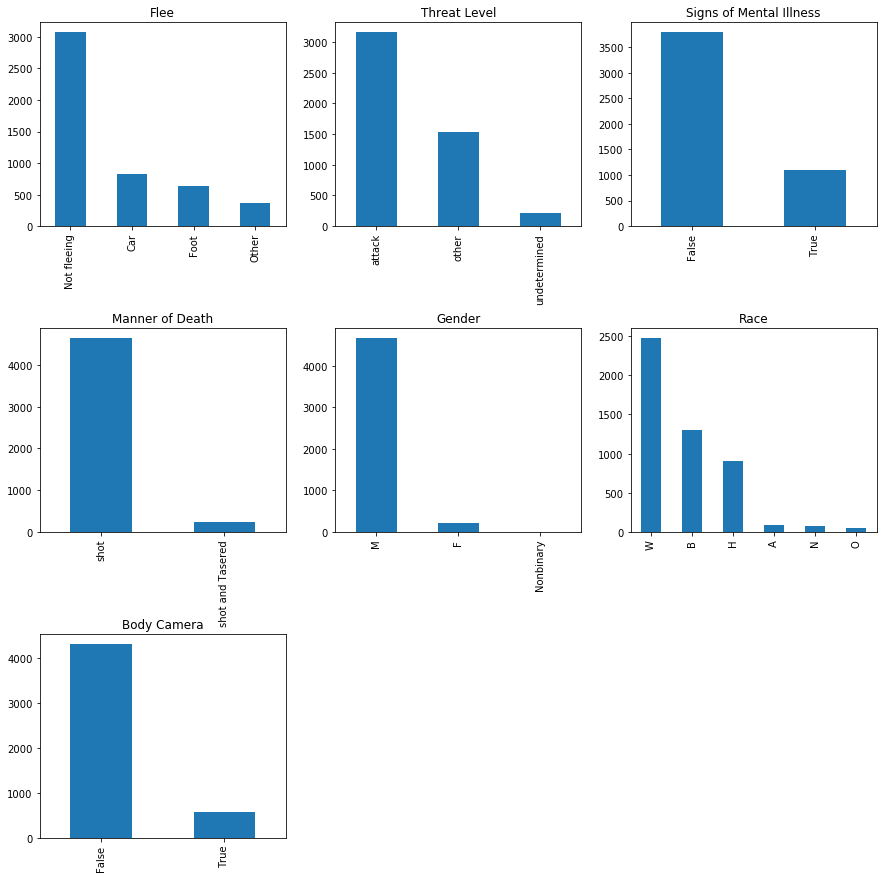

In [56]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(331)   
df.flee.value_counts().plot(kind='bar')
plt.gca().set_title('Flee')

fig.add_subplot(332)   
df.threat_level.value_counts().plot(kind='bar')
plt.gca().set_title('Threat Level')


fig.add_subplot(333)   
df.signs_of_mental_illness.value_counts().plot(kind='bar')
plt.gca().set_title('Signs of Mental Illness')

fig.add_subplot(334)   
df.manner_of_death.value_counts().plot(kind='bar')
plt.gca().set_title('Manner of Death')

fig.add_subplot(335)   
df.gender.value_counts().plot(kind='bar')
plt.gca().set_title('Gender')

fig.add_subplot(336)  
df.race.value_counts().plot(kind='bar')
plt.gca().set_title('Race')

fig.add_subplot(337)  
df.body_camera.value_counts().plot(kind='bar')
plt.gca().set_title('Body Camera')


plt.subplots_adjust(hspace = .5)


plt.show()


# Same histograms, with hue separating each category by race.

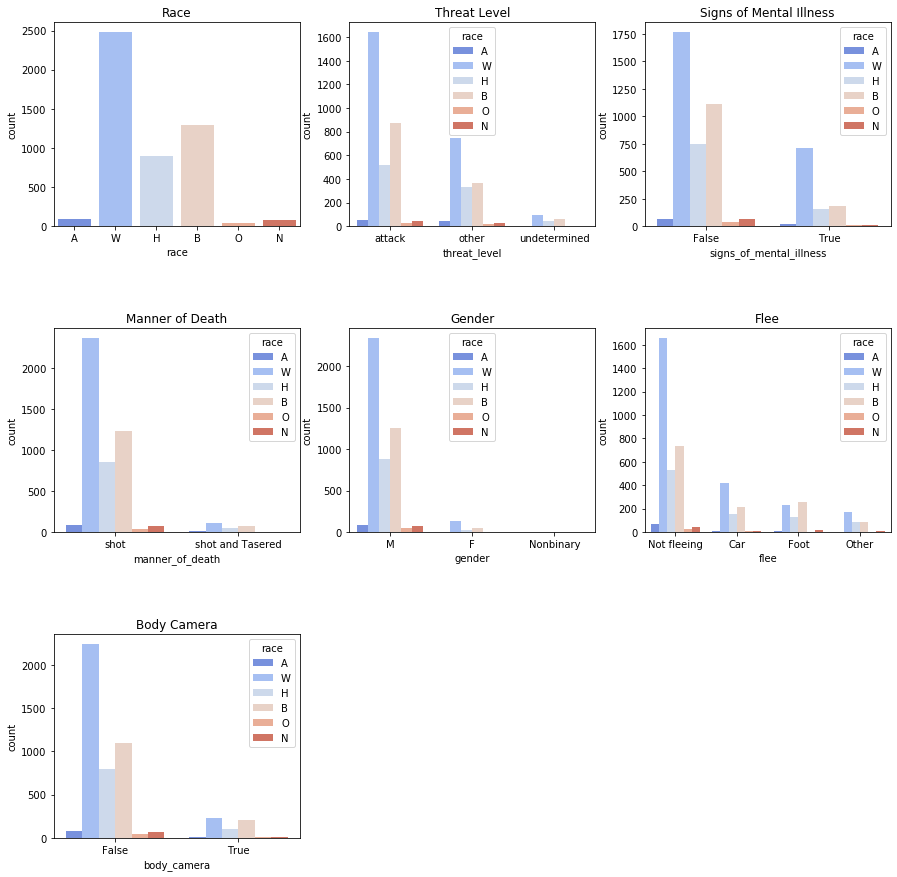

In [57]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(331) 
sns.countplot(x='race', data=df, palette='coolwarm')
plt.gca().set_title('Race')


fig.add_subplot(332)   
sns.countplot(x="threat_level",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Threat Level')


fig.add_subplot(333)   
sns.countplot(x="signs_of_mental_illness",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Signs of Mental Illness')

fig.add_subplot(334)   
sns.countplot(x="manner_of_death",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Manner of Death')

fig.add_subplot(335)   
sns.countplot(x="gender",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Gender')

fig.add_subplot(336)  
sns.countplot(x="flee",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Flee')

fig.add_subplot(337)  
sns.countplot(x="body_camera",hue="race",data=df, palette="coolwarm")
plt.gca().set_title('Body Camera')


plt.subplots_adjust(hspace = .5)

plt.savefig('../reports/figures/featuresbyrace.png', bbox_inches='tight')
plt.show()



### Wow. For all variables, the racial breakdown mirrors the overall racial distribution. I'm looking for signs that something can 'predict' black death but it's not in the circumstances of the death that I have data for. 

## Anamolies and Outliers - Review boxplots

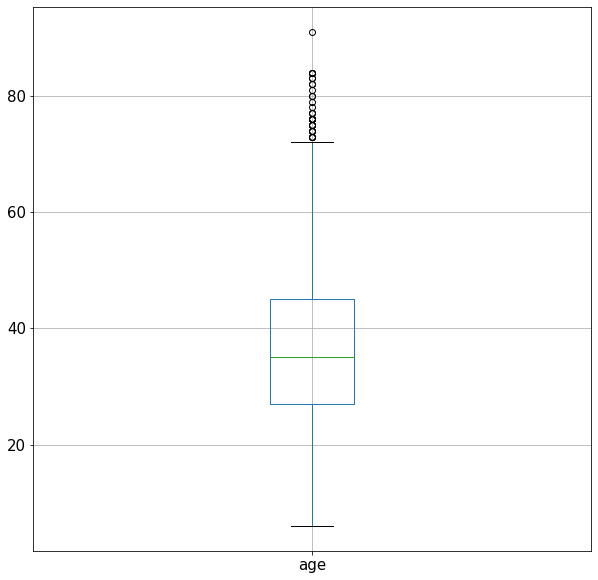

In [58]:
df.boxplot('age', vert=True, fontsize=15, figsize=(10,10))

##### What is the distribution of race in the upper outliers in age?

In [64]:
df.age.quantile(0.75)-df.age.quantile(0.25)

18.0

In [68]:
df.age.quantile(0.75) + 18*1.5

72.0

In [69]:
df[df.age>72].race.value_counts()

W    32
B     3
H     2
Name: race, dtype: int64

Text(0, 0.5, 'Race')

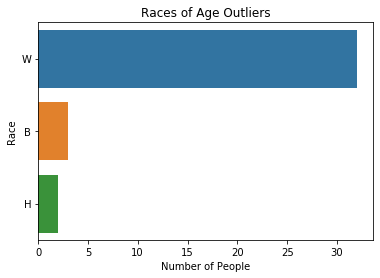

In [77]:
sns.barplot(x = df[df.age>72].race.value_counts(), y=['W','B', 'H'])
plt.title('Races of Age Outliers')
plt.xlabel('Number of People')
plt.ylabel("Race")

# Looking for correlations of numerical variables 

In [90]:
#Calculate the correlation coefficients
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,signs_of_mental_illness,body_camera
age,1.000000,0.100000,-0.040000
signs_of_mental_illness,0.100000,1.000000,0.050000
body_camera,-0.040000,0.050000,1.000000


###### These correlations are not useful because they're using the binary encoding of the body_camera and signs_of_mental_illness columns